### Example 1: Classifying film reviews according to valence

In [9]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# Load the IMDB dataset into training and test tensors, keeping the 10000
# most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
def decode_review(review):
    """
    Use the dataset's index to turn our lists of review numbers back into 
    words
    """
    word_index = imdb.get_word_index()
    reverse_index = dict([(value, key) for (key, value) in word_index.items()])
    return " ".join([reverse_index.get(index - 3, "?") for index in review])

decode_review(train_data[6])
train_labels[6]

1641221/1641221 [==============================] - 0s 0us/step


1

In [4]:
def vectorise_sequences(sequences, dimension = 10000):
    """
    Return a 'multi-hot' encoding of a sequence of integers
    e.g. vectorise_sequences([3,5]) = [0,0,1,0,1,0,0...]
    """
    # Initialise empty results vector
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i,j] = 1.
    return results

# Vectorise our training and test datasets
x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

# Vectorise the labels too
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

##### Initiate the model here 

In [40]:
# Define our model - three dense layers, two hidden w. 16 units each,
# one output layer with 1 to convert the outputs into a value x in (0,1).
model = keras.Sequential([
    # Dense relu layers implement max(dot(input, W) + b), 0)
    layers.Dense(4, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Define the loss function, optimiser and metrics
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [6]:
# Create and 'set aside' a validation set of data and labels
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [47]:
# Train the model
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 1s 22ms/step - loss: 0.1521 - accuracy: 0.9513 - val_loss: 0.2834 - val_accuracy: 0.8849
Epoch 2/4
30/30 [==============================] - 0s 13ms/step - loss: 0.1264 - accuracy: 0.9600 - val_loss: 0.2871 - val_accuracy: 0.8864
Epoch 3/4
30/30 [==============================] - 0s 15ms/step - loss: 0.1073 - accuracy: 0.9679 - val_loss: 0.2994 - val_accuracy: 0.8864
Epoch 4/4
30/30 [==============================] - 0s 13ms/step - loss: 0.0884 - accuracy: 0.9748 - val_loss: 0.3365 - val_accuracy: 0.8781


In [48]:
results = model.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 1ms/step - loss: 0.3555 - accuracy: 0.8685


[0.3554989695549011, 0.8684800267219543]

##### Plot the training and validation loss per epoch

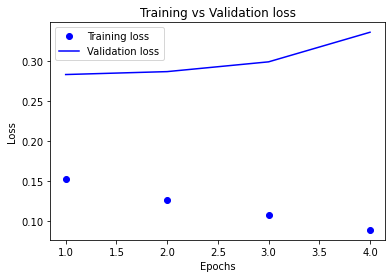

In [49]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)

# Plot loss values on training vs validation
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

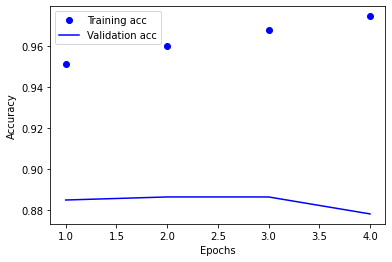

In [50]:
plt.clf() # Clear figure
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [51]:
model.predict(x_test)

782/782 [==============================] - 1s 1ms/step


array([[0.16597396],
       [0.999759  ],
       [0.9761517 ],
       ...,
       [0.04909706],
       [0.09514087],
       [0.65608245]], dtype=float32)

### Example 2: Classifying articles according to topic

### Scratch below

In [52]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])